# Modelo de Clusterización
* Modelo enfocado a detectar **posibles clusters** o diferentes grupos de clientes


## Librerias

In [ ]:
# Librerías

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns # importando seaborn
# Librería para obtener correlación
import scipy.stats as ss
# Librería para obtener todas las combinaciones (c/repetidos) de una lista
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


## Paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
HT_PATH = '/content/drive/MyDrive/Hackaton BBVA/Tablas_guardadas'
VR_PATH = '/content/drive/MyDrive/Reto Vinculación rentable'

#Dejar todo a dos puntos decimales
pd.options.display.float_format = "{:.2f}".format


#Crgar archivo de info
path = HT_PATH + "/fisicas.csv"
df = pd.read_csv(path)
df = df.drop(columns=["Unnamed: 0"])
df.head()

#Mostramos los primeros 10 valores del archivo
df.head(10)

,CODIGO_CLIENTE,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,EDAD,GENERO,UBIGEO_DIRECCION,SEGMENTO_COMERCIAL,ESTADO_CIVIL,AFILIACION_SMS,AFILIACION_BANCA_ONLINE,INGRESO_MENSUAL,GRUPO_RIESGO,PERIODO,RIESGO1,RIESGO2,RIESGO3,SALDO_MEDIO_VISTA,SALDO_MEDIO_AHORRO,SALDO_MEDIO_CTS,SALDO_MEDIO_PLAZO,SALDO_MEDIO_FONDO_MUTUO,SALDO_MEDIO_AUTOS,SALDO_MEDIO_CONSUMO,SALDO_MEDIO_TARJETAS,SALDO_MEDIO_HIPOTECARIO,SALDO_MEDIO_CARTERA,SALDO_MEDIO_LEASING,SALDO_MEDIO_PRESTAMOS_COMERCIALES,SALDO_MEDIO_COMEXT,SALDO_MEDIO_TJ_EMPRESAS,FAM_COBRANZAS,FAM_COMEX,FAM_PAGOHABERES,FAM_PROVEEDORES,FAM_SUPPLY,FAM_VISANET,T_NETCASH,T_SEGURO,T_WALLET,T_TCAMBIO,T_AFILIACION_DIGITAL,T_CARGO_RECURRENTE,SALDO_MEDIO_INVERSION_RENTABLE,SALDO_MEDIO_CARTERA_ATRASADA,VINCULACION_PN,VINCULACION_EMPRESA,SALDO_PUNTUAL,MARGEN_FINANCIERO,COMISIONES,MARGEN_BRUTO,EXPOSICION_DEFAULT,PERDIDA_ESPERADA,NUMERADOR_RATIO_RENTABILIDAD,DENOMINADOR_RATIO_RENTABILIDAD,RATIO_RENTABILIDAD
0,32623893,1,66657047,54,F,2501001,1,C,NO,NO,2376.04,2,202011,2,2,0,0.00,43.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,4.49,0.16,0.00,0.16,0.00,0.00,0.11,0.03,4.00
1,78061255,1,38149491,76,F,2501006,1,S,NO,NO,1038.63,0,202011,0,0,0,0.00,1.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,1.87,0.08,0.00,0.08,0.00,0.00,0.05,0.01,4.00
2,48102108,1,23914625,56,M,2501001,1,D,NO,NO,1038.63,0,202011,0,0,0,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.99
3,75218927,1,2180900,66,F,2501001,1,S,SI,SI,824.78,1,202011,0,0,0,0.00,12722.36,0.00,0.00,0.00,0.00,7139.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,0,1,0,7139.34,0.00,1,0,19145.39,1390.80,198.44,1589.23,6982.50,201.67,978.23,866.84,1.13
4,32630609,1,51973609,61,F,1601004,1,C,SI,SI,2023.63,0,202011,0,0,0,0.00,135.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0.00,0.00,0,0,135.77,4.77,0.00,4.77,0.00,0.00,3.36,0.84,4.00
5,96551001,1,17727421,68,M,2501001,1,V,SI,SI,993.06,1,202011,0,0,0,15732.03,87596.97,0.00,369292.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,1,1,0,1,0,0.00,0.00,1,0,454235.88,9478.53,5025.13,14503.66,29660.92,329.06,9993.09,2556.27,3.91
6,98481942,1,88444952,57,M,2501001,1,S,NO,NO,1124.50,2,202011,2,0,0,0.00,3.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,3.49,0.14,0.00,0.14,0.00,0.00,0.10,0.02,4.00
7,44400275,1,83381201,59,F,2501001,1,C,NO,NO,2330.46,1,202011,0,0,0,0.00,11785.02,5932.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,1,0,0.00,0.00,0,0,17991.55,799.19,0.00,799.19,0.00,0.00,563.43,140.86,4.00
8,26257807,1,94681340,65,M,2501006,1,S,NO,NO,1138.38,0,202011,0,0,0,0.00,1.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,1.13,0.05,0.00,0.05,0.00,0.00,0.03,0.01,4.00
9,13926033,1,27399130,85,F,2501001,1,C,SI,SI,476.33,0,202011,0,0,0,0.00,723.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0.00,0.00,0,0,735.92,26.14,0.00,26.14,0.00,0.00,18.43,4.61,4.00


In [ ]:
# Variables numericas

#df.dtypes

cat = [
"GENERO",
"ESTADO_CIVIL",
"AFILIACION_SMS",
"AFILIACION_BANCA_ONLINE"
]

In [ ]:
df = df.drop(columns=cat)
df = df.fillna(0)
#df

In [ ]:
columnas = list(df.columns)

In [ ]:
len(columnas)

51

In [ ]:
# Definir variables de entrada
X = df.iloc[:,0:49].values 
X

array([[ 3.2623893e+07,  1.0000000e+00,  6.6657047e+07, ...,
         0.0000000e+00,  0.0000000e+00,  1.0971300e-01],
       [ 7.8061255e+07,  1.0000000e+00,  3.8149491e+07, ...,
         0.0000000e+00,  0.0000000e+00,  5.3008000e-02],
       [ 4.8102108e+07,  1.0000000e+00,  2.3914625e+07, ...,
         0.0000000e+00,  0.0000000e+00,  2.8300000e-04],
       ...,
       [ 6.7533030e+06,  1.0000000e+00,  9.6451056e+07, ...,
         0.0000000e+00,  0.0000000e+00, -3.9398410e+00],
       [ 4.3430648e+07,  1.0000000e+00,  7.1447688e+07, ...,
         0.0000000e+00,  0.0000000e+00,  6.2938205e+01],
       [ 4.1968675e+07,  1.0000000e+00,  8.2674577e+07, ...,
         0.0000000e+00,  0.0000000e+00,  7.9845110e+01]])

In [ ]:
# Definir target
y = df.iloc[:,50].values
y

array([ 4.00000712e+00,  3.99998153e+00,  3.99421333e+00, ...,
       -3.61386993e+04,  3.04319100e+00,  3.16657900e+00])

## Matriz de Correlación

In [ ]:
data = pd.concat([df,X])

In [ ]:
data

,CODIGO_CLIENTE,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,EDAD,UBIGEO_DIRECCION,SEGMENTO_COMERCIAL,INGRESO_MENSUAL,GRUPO_RIESGO,PERIODO,RIESGO1,RIESGO2,RIESGO3,SALDO_MEDIO_VISTA,SALDO_MEDIO_AHORRO,SALDO_MEDIO_CTS,SALDO_MEDIO_PLAZO,SALDO_MEDIO_FONDO_MUTUO,SALDO_MEDIO_AUTOS,SALDO_MEDIO_CONSUMO,SALDO_MEDIO_TARJETAS,SALDO_MEDIO_HIPOTECARIO,SALDO_MEDIO_CARTERA,SALDO_MEDIO_LEASING,SALDO_MEDIO_PRESTAMOS_COMERCIALES,SALDO_MEDIO_COMEXT,SALDO_MEDIO_TJ_EMPRESAS,FAM_COBRANZAS,FAM_COMEX,FAM_PAGOHABERES,FAM_PROVEEDORES,FAM_SUPPLY,FAM_VISANET,T_NETCASH,T_SEGURO,T_WALLET,T_TCAMBIO,T_AFILIACION_DIGITAL,T_CARGO_RECURRENTE,SALDO_MEDIO_INVERSION_RENTABLE,SALDO_MEDIO_CARTERA_ATRASADA,VINCULACION_PN,VINCULACION_EMPRESA,SALDO_PUNTUAL,MARGEN_FINANCIERO,COMISIONES,MARGEN_BRUTO,EXPOSICION_DEFAULT,PERDIDA_ESPERADA,NUMERADOR_RATIO_RENTABILIDAD,DENOMINADOR_RATIO_RENTABILIDAD,target,principal component 1,principal component 2
0,32623893.00,1.00,66657047.00,54.00,2501001.00,1.00,2376.04,2.00,202011.00,2.00,2.00,0.00,0.00,43.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.49,0.16,0.00,0.16,0.00,0.00,0.11,0.03,ALTO,nan,nan
1,78061255.00,1.00,38149491.00,76.00,2501006.00,1.00,1038.63,0.00,202011.00,0.00,0.00,0.00,0.00,1.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.87,0.08,0.00,0.08,0.00,0.00,0.05,0.01,ALTO,nan,nan
2,48102108.00,1.00,23914625.00,56.00,2501001.00,1.00,1038.63,0.00,202011.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,ALTO,nan,nan
3,75218927.00,1.00,2180900.00,66.00,2501001.00,1.00,824.78,1.00,202011.00,0.00,0.00,0.00,0.00,12722.36,0.00,0.00,0.00,0.00,7139.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,7139.34,0.00,1.00,0.00,19145.39,1390.80,198.44,1589.23,6982.50,201.67,978.23,866.84,MEDIO,nan,nan
4,32630609.00,1.00,51973609.00,61.00,1601004.00,1.00,2023.63,0.00,202011.00,0.00,0.00,0.00,0.00,135.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,135.77,4.77,0.00,4.77,0.00,0.00,3.36,0.84,ALTO,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905638,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,-0.61,0.48
905639,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,-0.53,0.42
905640,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,-0.87,1.42
905641,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,-0.78,1.35


In [ ]:
#INTERACTIVA
# Calcular correlación de Variables
# ----------------------------------------------- Correlación de Pearson -----------------------------------------------
tabla_corr = data

@interact
def correlacion(method = ["pearson","spearman","kendall"]):
  
  numericas=['CODIGO_CLIENTE', 'TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO', 'EDAD',
      'UBIGEO_DIRECCION', 'SEGMENTO_COMERCIAL', 'INGRESO_MENSUAL',
      'GRUPO_RIESGO', 'PERIODO', 'RIESGO1', 'RIESGO2', 'RIESGO3',
      'SALDO_MEDIO_VISTA', 'SALDO_MEDIO_AHORRO', 'SALDO_MEDIO_CTS',
      'SALDO_MEDIO_PLAZO', 'SALDO_MEDIO_FONDO_MUTUO', 'SALDO_MEDIO_AUTOS',
      'SALDO_MEDIO_CONSUMO', 'SALDO_MEDIO_TARJETAS',
      'SALDO_MEDIO_HIPOTECARIO', 'SALDO_MEDIO_CARTERA', 'SALDO_MEDIO_LEASING',
      'SALDO_MEDIO_PRESTAMOS_COMERCIALES', 'SALDO_MEDIO_COMEXT',
      'SALDO_MEDIO_TJ_EMPRESAS', 'FAM_COBRANZAS', 'FAM_COMEX',
      'FAM_PAGOHABERES', 'FAM_PROVEEDORES', 'FAM_SUPPLY', 'FAM_VISANET',
      'T_NETCASH', 'T_SEGURO', 'T_WALLET', 'T_TCAMBIO',
      'T_AFILIACION_DIGITAL', 'T_CARGO_RECURRENTE',
      'SALDO_MEDIO_INVERSION_RENTABLE', 'SALDO_MEDIO_CARTERA_ATRASADA',
      'VINCULACION_PN', 'VINCULACION_EMPRESA', 'SALDO_PUNTUAL',
      'MARGEN_FINANCIERO', 'COMISIONES', 'MARGEN_BRUTO', 'EXPOSICION_DEFAULT',
      'PERDIDA_ESPERADA', 'NUMERADOR_RATIO_RENTABILIDAD',
      'DENOMINADOR_RATIO_RENTABILIDAD']

  print('-------------------------------------------- VARIABLES NUMERICAS-------------------------------------------------------')

  var_num = numericas
  cont = 1
  
  
  
  for var in var_num:
      tabla_corr[var]=tabla_corr[var].astype(float)

  corr = tabla_corr.corr(method)
  plt.figure(figsize=(20, 10))
  sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values\
              ,annot = True,linewidths = .6, cmap="Blues")
  plt.title("Tabla de correlacion de " + method)
  plt.show()
  plt.clf()

  return 



interactive(children=(Dropdown(description='method', options=('pearson', 'spearman', 'kendall'), value='pearso…

## Normalización

In [ ]:

# Aplicar Normalización: Standard Scaler

# Creamos el Objeto de Escalamiento
std_scaler = StandardScaler()

# aplicamos fit y transform a la data 
X_std = std_scaler.fit_transform(X)

X_std

array([[-0.60609251, -0.00514793,  0.39718483, ..., -0.11754201,
        -0.05045713, -0.06086428],
       [ 0.97350067, -0.00514793, -0.29451036, ..., -0.11754201,
        -0.05045713, -0.06087596],
       [-0.06800487, -0.00514793, -0.63989908, ..., -0.11754201,
        -0.05045713, -0.06088682],
       ...,
       [-1.50546268, -0.00514793,  1.12009396, ..., -0.11754201,
        -0.05045713, -0.06169832],
       [-0.23040441, -0.00514793,  0.5134229 , ..., -0.11754201,
        -0.05045713, -0.04792419],
       [-0.28122872, -0.00514793,  0.78582735, ..., -0.11754201,
        -0.05045713, -0.04444206]])

## PCA

In [ ]:
# Matriz de Covarianza

#mean_vec = np.mean(X_std, axis=0) 
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) 
#print('Covariance matrix \n%s' %cov_mat) 
print('Covariance matrix \n') 
cov_mat= np.cov(X_std, rowvar=False) 
cov_mat

Covariance matrix 



array([[ 1.00000110e+00, -5.31861564e-03,  3.92244997e-03, ...,
         3.53833098e-03, -2.84227139e-03,  2.83861882e-03],
       [-5.31861564e-03,  1.00000110e+00,  5.43662985e-01, ...,
        -5.93945322e-04, -2.54629644e-04, -2.50313950e-04],
       [ 3.92244997e-03,  5.43662985e-01,  1.00000110e+00, ...,
         3.67358830e-03,  7.29915744e-04,  9.17756607e-04],
       ...,
       [ 3.53833098e-03, -5.93945322e-04,  3.67358830e-03, ...,
         1.00000110e+00,  3.63996627e-01,  1.79383077e-02],
       [-2.84227139e-03, -2.54629644e-04,  7.29915744e-04, ...,
         3.63996627e-01,  1.00000110e+00, -7.43300693e-01],
       [ 2.83861882e-03, -2.50313950e-04,  9.17756607e-04, ...,
         1.79383077e-02, -7.43300693e-01,  1.00000110e+00]])

In [ ]:
# Eigenvalores y Eigenvectores

eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.18824670e-03  2.09949911e-03 -3.34843213e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.97473794e-04  1.94278887e-04  8.69993098e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.97913020e-03  2.12154809e-05  9.11079336e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.40109428e-01 -1.42883889e-01  4.26894258e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.54804668e-01 -5.31682855e-01  1.61492442e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.23803824e-02  5.06701153e-01  2.01172396e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

Eigenvalues 
[5.11499167e+00 2.65369143e+00 2.05190765e+00 2.00055208e+00
 1.89892631e+00 1.85056915e+00 1.61032474e+00 1.54384284e+00
 1.50181929e+00 1.09340230e-02 9.95199716e-04 3.25023085e-07
 1.32539922e-01 1.49439559e-01 1.85101128e-01 1.90736455e-01
 2.71413011e-01 1.32581827e+00 4.04673668e-01 4.56020090e-01
 4.46968812e-01 4.99470360e-01 

In [ ]:
# Verificación de Eigenvalores y Eigenvectores

sq_eig=[] 
for i in eig_vecs:
  sq_eig.append(i**2) 
print(sq_eig) 
sum(sq_eig) 
print("sum of squares of each values in an eigen vector is \n", 0.27287211+ 0.13862096+0.51986524+ 0.06864169) 
for ev in eig_vecs:
  np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

[array([1.41193022e-06, 4.40789650e-06, 1.12119978e-05, 9.01397981e-07,
       3.84979969e-05, 4.47633356e-06, 2.44529183e-06, 4.01776177e-06,
       6.59342612e-05, 6.83112772e-09, 1.13480599e-10, 1.69436204e-12,
       2.32464490e-07, 1.27298848e-06, 1.10785055e-06, 8.44675942e-07,
       2.76164606e-05, 4.15417271e-05, 2.65548835e-05, 1.41702919e-04,
       3.17834609e-06, 1.81622071e-05, 2.61796945e-06, 3.26272973e-06,
       7.34016735e-05, 1.11343366e-04, 6.70453730e-04, 2.06781372e-05,
       1.21701850e-03, 9.30089232e-05, 2.87783772e-04, 4.71886436e-06,
       1.45961815e-03, 2.05582120e-04, 2.37726169e-04, 5.57852187e-03,
       4.01604813e-04, 7.58792512e-04, 8.54069726e-02, 8.42486365e-01,
       3.14812600e-03, 4.77774721e-04, 2.48534432e-02, 6.12980008e-03,
       2.13340059e-02, 4.64185332e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]), array([1.57985417e-07, 3.77442861e-08, 7.56887990e-05, 5.35528813e-07,
       7.19480144e-06, 2.07708930e-05, 1.18451008e-

In [ ]:
# Selección de componentes principales

#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
for i in range(len(eig_vals))]
print(type(eig_pairs)) 
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.reverse() 
print("\n",eig_pairs) 
#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

<class 'list'>

 [(0.0, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])), (0.0, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])), (0.0, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])), (0.9586210478898535, array([ 6.81311479e-02, -1.58647023e-03, -1.55205678e-03,  2.43670719e-02,
        3.71698212e-01, -2.61509671e-01, -2.43891543e-01,  8.33068654e-02,
       -6.06542279e-02,  1.01216531e-01, -2.48262719e-01,  0.00000000e+00,
        7.85195522e-03,  8.22339679e-02, -4.09087182e-01, 

In [ ]:
# Varianza Explicada

tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Varianza Explicada\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Acumulado de Varianza Explicada\n",cum_var_exp) 
print("\n\n3. Porcentaje de las varianza de las primeras dos componentes principales por separado\n ",var_exp[0:2]) 
print("\n\n4. Porcentaje de las varianza de las primeras dos componentes principales juntas \n",sum(var_exp[0:2]))




 46.00005079269741


1. Varianza Explicada
 [11.119534830641484, 5.768888049473351, 4.46066387234299, 4.349021449122635, 4.128096108553443, 4.022971974966929, 3.5007020996439855, 3.3561763738292187, 3.2648209409285047, 2.882210456485704, 2.6510623166004157, 2.5515310093667827, 2.459319236907295, 2.357502563005858, 2.2765289179590344, 2.245072466388305, 2.183132897499709, 2.177017902925168, 2.13127515008967, 2.1111144690739145, 2.083956498678554, 2.0626159091171217, 2.007764755151029, 1.9914877189477036, 1.961468366322966, 1.8639807434990028, 1.8003549825265566, 1.6562984964551126, 1.6164204028848508, 1.5672629783149608, 1.486316203602974, 1.404319552172635, 1.3382733552925572, 1.1882945249200452, 1.0858039305466969, 0.9913469262429044, 0.9716702582715746, 0.8797243931817477, 0.5900276322272816, 0.41464400964246423, 0.40239331147561136, 0.3248682472281448, 0.28812994668170205, 0.02376958898631223, 0.002163475253927405, 7.06571143703592e-07, 0.0, 0.0, 0.0]


2. Acumulado de Varianza Exp

In [ ]:
# Matriz W
print(eig_pairs[0][1]) 
print(eig_pairs[1][1]) 
matrix_w = np.hstack((eig_pairs[0][1].reshape(49,1), eig_pairs[1][1].reshape(49,1))) 
#hstack: Stacks arrays in sequence horizontally (column wise). print('Matrix W:\n', matrix_w)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# Proyecciones

Y = X_std.dot(matrix_w) 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()


,principal component 1,principal component 2
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00


In [ ]:
# Data Frame
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['RATIO_RENTABILIDAD'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,RATIO_RENTABILIDAD
0,0.00,0.00,4.00
1,0.00,0.00,4.00
2,0.00,0.00,3.99
3,0.00,0.00,1.13
4,0.00,0.00,4.00


In [ ]:
# Visualización

fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15) 
ax.set_ylabel('Componente Principal 2', fontsize = 15) 
ax.set_title('PCA de dos Componentes', fontsize = 20) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['species'] == target  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2'] , c = color , s = 50) ax.legend(targets) ax.grid()

SyntaxError: ignored

In [ ]:
###################################################################

In [ ]:
pca = PCA(n_components=2) 
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance. However we know from above computation that 2 components are enough so we have passed the 2 components.
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) # prints the top 5 rows


,principal component 1,principal component 2
0,-1.00,1.16
1,-0.67,0.07
2,-0.72,0.09
3,1.14,-0.81
4,-0.46,-0.13


In [ ]:
finalDf = pd.concat([principalDf, finalDf[['RATIO_RENTABILIDAD']]], axis = 1) 
finalDf.head(5)

,principal component 1,principal component 2,RATIO_RENTABILIDAD
0,-1.00,1.16,4.00
1,-0.67,0.07,4.00
2,-0.72,0.09,3.99
3,1.14,-0.81,1.13
4,-0.46,-0.13,4.00


## Método del Codo y Método de la Silueta

In [ ]:
X = principalDf

In [ ]:
principalDf.dtypes

principal component 1    float64
principal component 2    float64
dtype: object

In [ ]:
X[:, ]

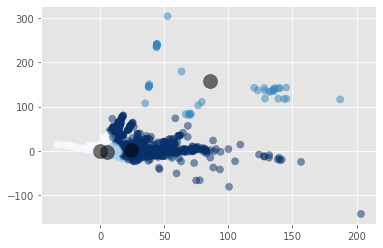

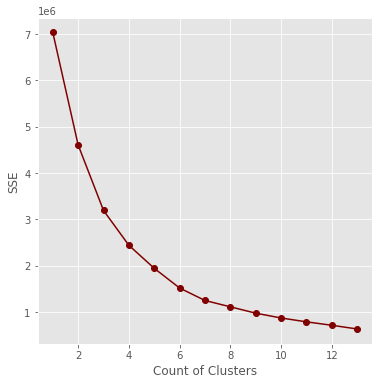

In [ ]:
k = 13
plt.style.use('ggplot')

# train model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# visualize centriods on data
centriods = kmeans.cluster_centers_

plt.scatter(
    X["principal component 1"], 
    X["principal component 2"],
    c=y_kmeans, 
    s=50, 
    cmap='Blues',
    alpha = 0.5
)

plt.scatter(
    centriods[:, 0], 
    centriods[:, 1], 
    c='black',
    s=200,
    alpha=0.55
)

# elbow method to identify optimal value of K
sse = []
for k in range(1, k + 1):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# plot to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(1, k + 1), sse, '-o', c = 'maroon')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE');

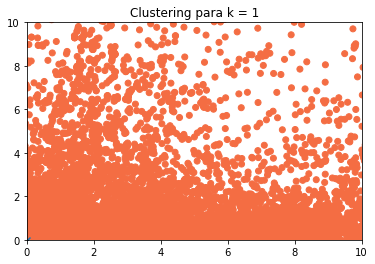

In [ ]:
max_k = 5    ## maximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []
cmap = cm.get_cmap("Spectral")
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [np.sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
    if 1<k<len(X):
       ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+ (k+1)*10])
    
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(X["principal component 1"], X["principal component 2"], c=label_color)
    plt.scatter(centers[0], centers[1], marker = "x")
    plt.show()

ValueError: ignored

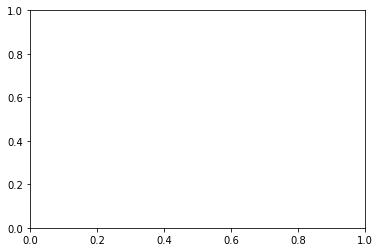

In [ ]:
#Representación del codo
plt.plot(10, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

In [ ]:
#Representación del codo normalizado
plt.plot(10, 1-ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k))")
plt.title("La técnica del codo normalizado para encontrar el k óptimo")
plt.show()

NameError: ignored

## Varianza Explicada

,Varianza Explicada
0,0.560162
1,0.243782
2,0.139960
3,0.049797
4,0.005737


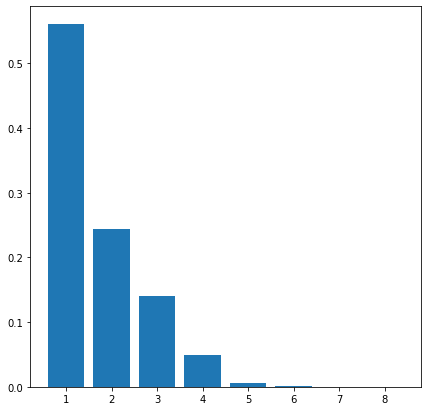

In [ ]:
# pcaModel = PCA(k=k, inputCol="features", outputCol="featuresPCA").fit(transformed)
# transformedFeaturesDF = pcaModel.transform(transformed)

plt.figure(figsize=(7,7))
eigenvalues = [float(value) for value in X.explainedVariance]
plt.bar(list(range(1,len(eigenvalues)+1)),eigenvalues)
varianza = pd.DataFrame(eigenvalues,columns=['Varianza Explicada'])
varianza.head()

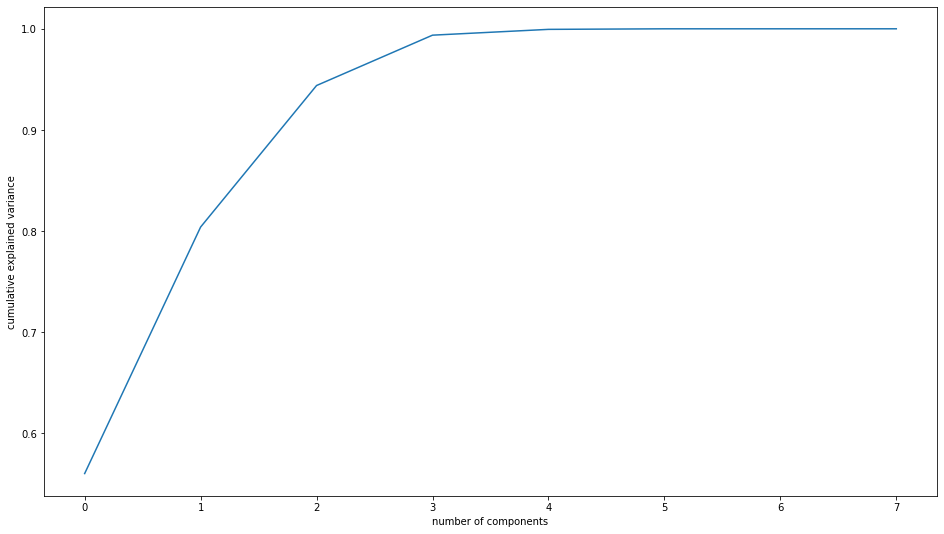

In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.figure(figsize = (16, 9))
plt.plot(np.cumsum(varianza['Varianza Explicada']))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

## Matriz de Correlación

In [ ]:
#INTERACTIVA
# Calcular correlación de Variables
# ----------------------------------------------- Correlación de Pearson -----------------------------------------------
tabla_corr = X

@interact
def correlacion(method = ["pearson","spearman","kendall"]):
    
    numericas=[
    'bus_vol_eop',
    'bureau_risk_group',
    'avg_bal_natl',
    'blance_epigraph'
      ]

    print('-------------------------------------------- VARIABLES NUMERICAS-------------------------------------------------------')

    var_num = numericas
    cont = 1
    
    
    
    for var in var_num:
        tabla_corr[var]=tabla_corr[var].astype(float)

    corr = tabla_corr.corr(method)
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values\
                ,annot = True,linewidths = .6, cmap="Blues")
    plt.title("Tabla de correlacion de " + method)
    plt.show()
    plt.clf()

## Clusters

In [ ]:
@interact_manual
def grafica(tresD = [True, False],
           opacidad = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
            tamaño = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
            marca = ["o",".",",","v","^","<",">","1","2","3","4","8","s","p","*","H","h","+","X","x","D","d","|","_"],
            colores = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'],
            a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360],
            b = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
           ):

    df = X    
    plt.figure(figsize = (16, 9))
    #colors = np.where(df["Animation"]==1,'y','k')
    #etiqueta = np.where(df['target'].unique() == 1, 'malos','buenos')
    
    if tresD == True:
        ax = plt.axes(projection ="3d")     
        ax.scatter3D(x, y, z, c = df['target'], s = tamaño, marker = marca, alpha = opacidad, cmap = colores)
        ax.view_init(a, b)
        ax.set_zlabel('Z')
        
    else:
        plt.scatter(x, y, c = df['target'], s = tamaño, marker = marca, alpha = opacidad,cmap = colores)
    
    plt.legend(['buenos', 'malos'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Nube de Puntos: Modelo Originación')
    #plt.colorbar()
    plt.show()
    


interactive(children=(Dropdown(description='tresD', options=(True, False), value=True), Dropdown(description='…

In [ ]:
# @interact_manual
# def subplots(
#            opacidad = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
#            tamaño = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
#            marca = ["o",".",",","v","^","<",">","1","2","3","4","8","s","p","*","H","h","+","X","x","D","d","|","_"], 
#            colores = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
#            ):
    
#     df = data  
#     plt.figure(figsize = (16, 9))
    
#     plt.subplot(2, 3, 1, )
#     plt.scatter(x, y, c = df['target'], s = tamaño, marker = marca, cmap = colores, alpha = opacidad)
#     #plt.scatter(x, y, c = df['target'] == 0, s = buenos, marker = buenos_m, cmap = colores, alpha = opacidad)
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.subplot(2, 3, 2)
#     #plt.scatter(y, z, c = df['target'] == 1, s = malos, marker = malos_m, cmap = "Greys", alpha = opacidad)
#     plt.scatter(y, z, c = df['target'], s = tamaño, marker = marca, cmap = colores, alpha = opacidad)
#     plt.xlabel('Y')
#     plt.ylabel('Z')
#     plt.subplot(2, 3, 3)
#     #plt.scatter(z, w, c = df['target'] == 1, s = malos, marker = malos_m, cmap = "Greys", alpha = opacidad)
#     plt.scatter(z, w, c = df['target'], s = tamaño, marker = marca, cmap = colores, alpha = opacidad)
#     plt.xlabel('Z')
#     plt.ylabel('W')
#     plt.subplot(2, 3, 4)
#     #plt.scatter(w, x, c = df['target'] == 1, s = malos, marker = malos_m, cmap = "Greys", alpha = opacidad)
#     plt.scatter(w, x, c = df['target'], s = tamaño, marker = marca, cmap = colores, alpha = opacidad)
#     plt.xlabel('W')
#     plt.ylabel('X')
#     plt.subplot(2, 3, 5)
#     #plt.scatter(z, x, c = df['target'] == 1, s = malos, marker = malos_m, cmap = "Greys", alpha = opacidad)
#     plt.scatter(z, x, c = df['target'], s = tamaño, marker = marca, cmap = colores, alpha = opacidad)
#     plt.xlabel('Z')
#     plt.ylabel('X')
#     plt.subplot(2, 3, 6)
#     #plt.scatter(w, y, c = df['target'] == 1, s = malos, marker = malos_m, cmap = "Greys", alpha = opacidad)
#     plt.scatter(w, y, c = df['target'], s = tamaño, marker = marca, cmap = colores, alpha = opacidad)
#     plt.xlabel('W')
#     plt.ylabel('Y')

    
    plt.title('SubPlots PCA')
    plt.show()

interactive(children=(Dropdown(description='opacidad', options=(0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9…

In [ ]:
df['target'] = np.where(((df['RATIO_RENTABILIDAD']>= -72) & (df['RATIO_RENTABILIDAD']<= 0)),'BAJO',
                      np.where(((df['RATIO_RENTABILIDAD']> 0) & (df['RATIO_RENTABILIDAD']<= 3.20466)),'MEDIO',
                      np.where((df['RATIO_RENTABILIDAD']> 3.20466),'ALTO','ALTO')))

df = df.drop(columns=["RATIO_RENTABILIDAD"])
df.head()